In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('/content/drive/MyDrive/feature_engineering.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
y = df['diagnosis'] # Dependent variable
X = df.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1) # Independent Variable


def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

pca_df = create_pca_df(X, y)

In [5]:
pca_df.head()

,PC1,PC2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M


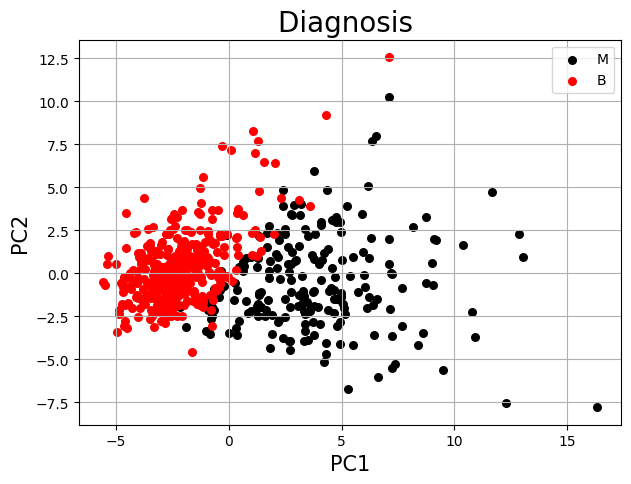

In [ ]:
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = ["black", "red"]

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c = color, s = 30)
    ax.legend(targets)
    ax.grid()
    plt.show()

plot_pca(pca_df, "diagnosis")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assume X_train, y_train are your training data
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                    Feature  Importance
22          perimeter_worst    0.131537
23               area_worst    0.130361
20             radius_worst    0.119962
27     concave points_worst    0.100908
7       concave points_mean    0.087612
3                 area_mean    0.065693
0               radius_mean    0.063482
2            perimeter_mean    0.052746
6            concavity_mean    0.036000
26          concavity_worst    0.029831
13                  area_se    0.021603
10                radius_se    0.019100
21            texture_worst    0.018626
28           symmetry_worst    0.014827
25        compactness_worst    0.013932
1              texture_mean    0.013117
24         smoothness_worst    0.012562
29  fractal_dimension_worst    0.011865
5          compactness_mean    0.007201
4           smoothness_mean    0.006616
12             perimeter_se    0.005576
17        concave points_se    0.005454
18              symmetry_se    0.005344
14            smoothness_se    0.004698
